In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [226]:
data = load_iris()
X, y, column_names = data['data'], data['target'], data['feature_names']
X = pd.DataFrame(X, columns = column_names)

## Байесовская

In [227]:
from sklearn.naive_bayes import GaussianNB
accuracy_b = dict()
precision_b = dict()
recall_b = dict()
f1_b = dict()
for tr_size in np.arange(0.6, 0.9, 0.05):
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = tr_size)
  model = GaussianNB()
  model.fit(X_train, y_train)
  key = "{start:.0f}:{end:.0f}".format(start = tr_size * 100, end = 100 - tr_size * 100)
  accuracy_b[key] = accuracy_score(y_val, model.predict(X_val))
  precision_b[key] = precision_score(y_val, model.predict(X_val), average='macro')
  recall_b[key] = recall_score(y_val, model.predict(X_val), average='macro')
  f1_b[key] = f1_score(y_val, model.predict(X_val), average='macro')

<BarContainer object of 7 artists>

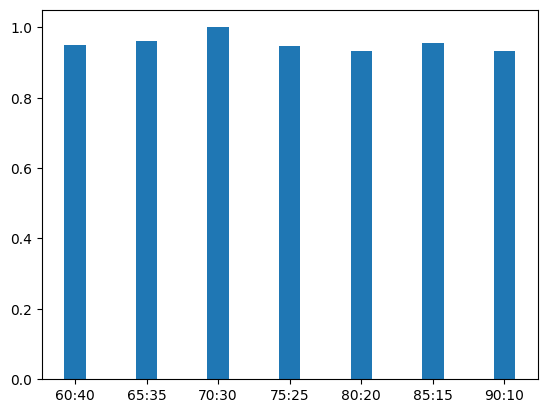

In [228]:
plt.bar(accuracy_b.keys(), accuracy_b.values(), 0.3)

<BarContainer object of 7 artists>

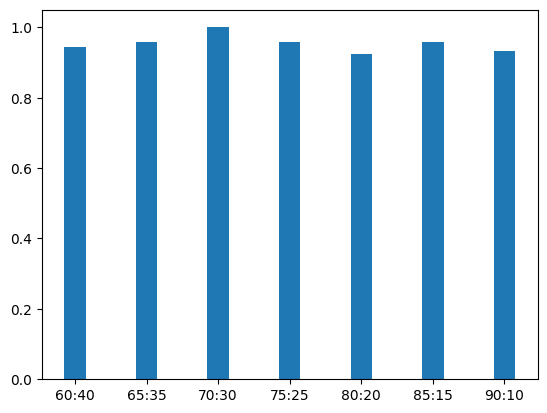

In [229]:
plt.bar(precision_b.keys(), precision_b.values(), 0.3)

<BarContainer object of 7 artists>

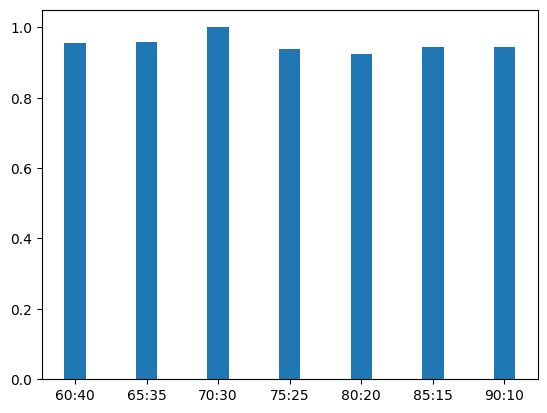

In [230]:
plt.bar(recall_b.keys(), recall_b.values(), 0.3)

<BarContainer object of 7 artists>

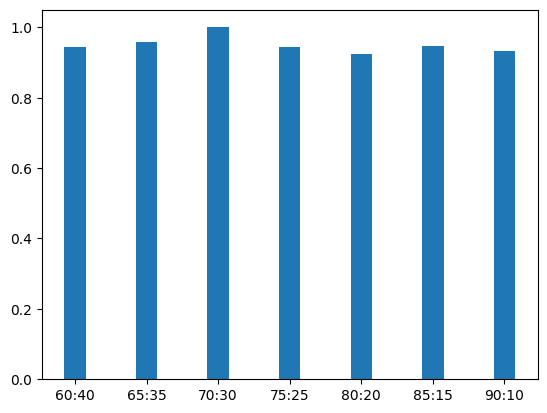

In [231]:
plt.bar(f1_b.keys(), f1_b.values(), 0.3)

## Деревья решений

In [232]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
accuracy_t = dict()
precision_t = dict()
recall_t = dict()
f1_t = dict()
for tr_size in np.arange(0.6, 0.9, 0.05):
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = tr_size)
  clf = clf.fit(X_train, y_train)
  key = "{start:.0f}:{end:.0f}".format(start = tr_size * 100, end = 100 - tr_size * 100)
  accuracy_t[key] = accuracy_score(y_val, clf.predict(X_val))
  precision_t[key] = precision_score(y_val, clf.predict(X_val), average='macro')
  recall_t[key] = recall_score(y_val, clf.predict(X_val), average='macro')
  f1_t[key] = f1_score(y_val, clf.predict(X_val), average='macro')

<BarContainer object of 7 artists>

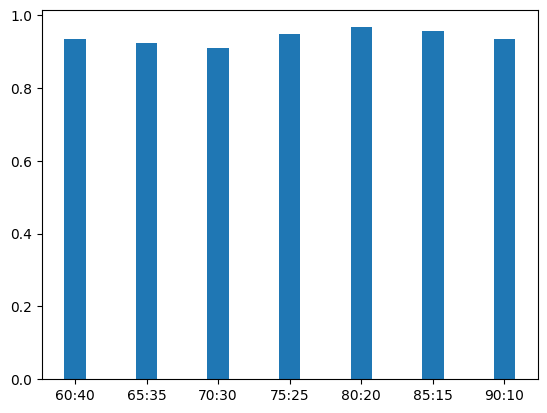

In [233]:
plt.bar(accuracy_t.keys(), accuracy_t.values(), 0.3)

<BarContainer object of 7 artists>

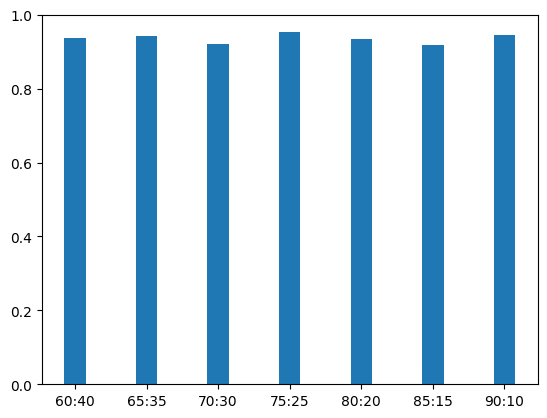

In [234]:
plt.bar(precision_t.keys(), precision_t.values(), 0.3)

<BarContainer object of 7 artists>

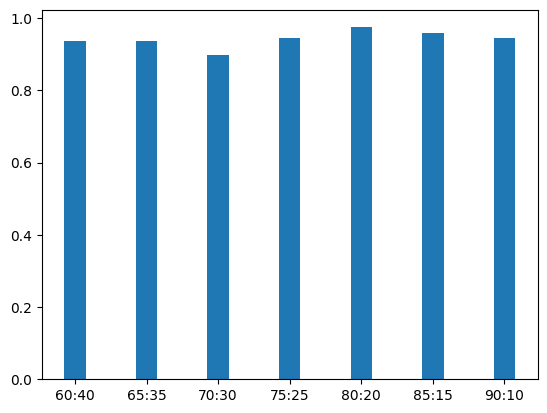

In [235]:
plt.bar(recall_t.keys(), recall_t.values(), 0.3)

<BarContainer object of 7 artists>

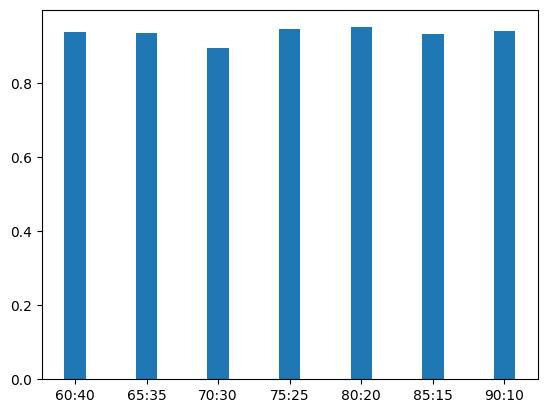

In [236]:
plt.bar(f1_t.keys(), f1_t.values(), 0.3)

In [237]:
clf = tree.DecisionTreeClassifier(criterion = 'log_loss')
for tr_size in np.arange(0.6, 0.9, 0.05):
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = tr_size)
  clf = clf.fit(X_train, y_train)
  key = "{start:.0f}:{end:.0f}".format(start = tr_size * 100, end = 100 - tr_size * 100)
  accuracy_t[key] = accuracy_score(y_val, clf.predict(X_val))
  precision_t[key] = precision_score(y_val, clf.predict(X_val), average='macro')
  recall_t[key] = recall_score(y_val, clf.predict(X_val), average='macro')
  f1_t[key] = f1_score(y_val, clf.predict(X_val), average='macro')

<BarContainer object of 7 artists>

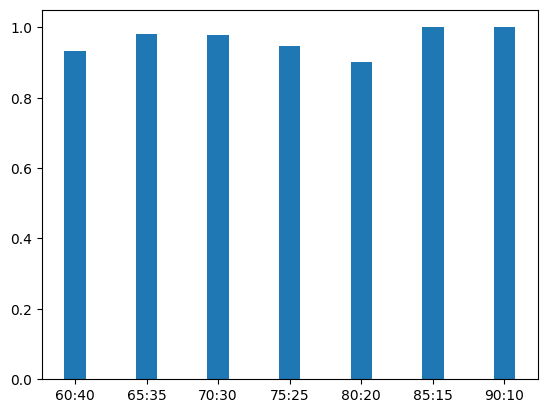

In [238]:
plt.bar(accuracy_t.keys(), accuracy_t.values(), 0.3)

<BarContainer object of 7 artists>

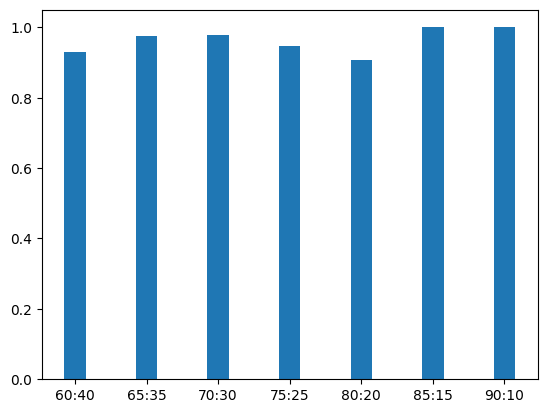

In [239]:
plt.bar(precision_t.keys(), precision_t.values(), 0.3)

<BarContainer object of 7 artists>

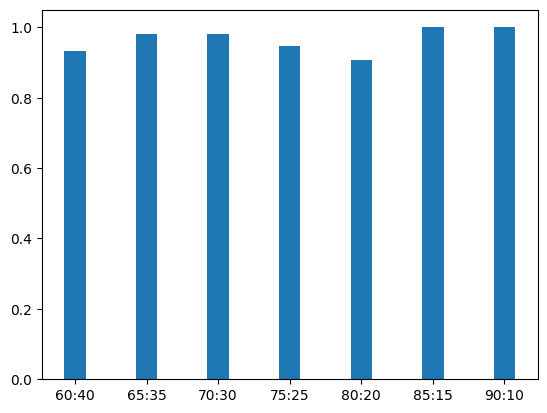

In [240]:
plt.bar(recall_t.keys(), recall_t.values(), 0.3)

<BarContainer object of 7 artists>

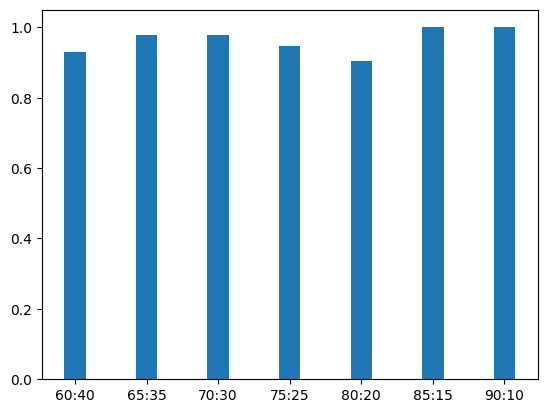

In [241]:
plt.bar(f1_t.keys(), f1_t.values(), 0.3)

## Бэггинг

In [291]:
from sklearn import ensemble
accuracy_beg = dict()
precision_beg = dict()
recall_beg = dict()
f1_beg = dict()
for n_estimators in np.arange(50, 100, 10):
  bclf = ensemble.BaggingClassifier(n_estimators = n_estimators)
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.75)
  bclf = bclf.fit(X_train, y_train)
  key = "{start:.0f}".format(start = n_estimators)
  accuracy_beg[key] = accuracy_score(y_val, bclf.predict(X_val))
  precision_beg[key] = precision_score(y_val, bclf.predict(X_val), average='macro')
  recall_beg[key] = recall_score(y_val, bclf.predict(X_val), average='macro')
  f1_beg[key] = f1_score(y_val, bclf.predict(X_val), average='macro')

<BarContainer object of 5 artists>

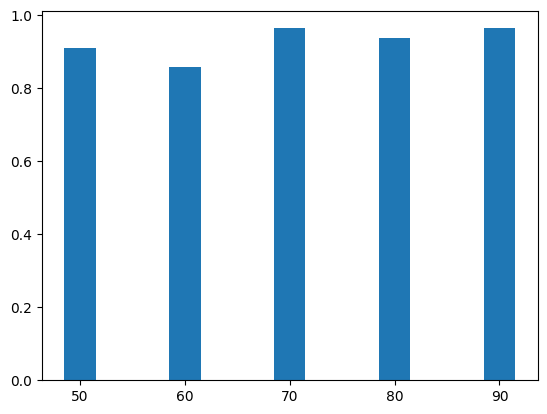

In [292]:
plt.bar(accuracy_beg.keys(), accuracy_beg.values(), 0.3)

<BarContainer object of 5 artists>

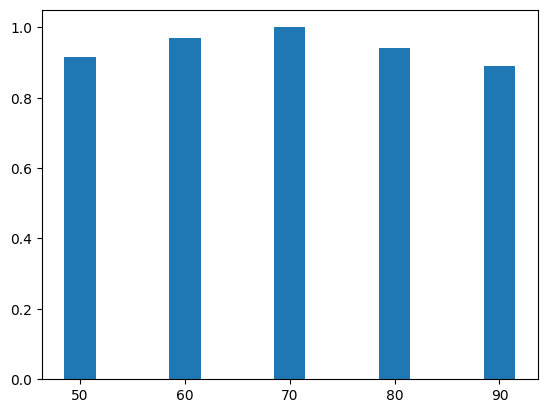

In [272]:
plt.bar(precision_beg.keys(), precision_beg.values(), 0.3)

<BarContainer object of 5 artists>

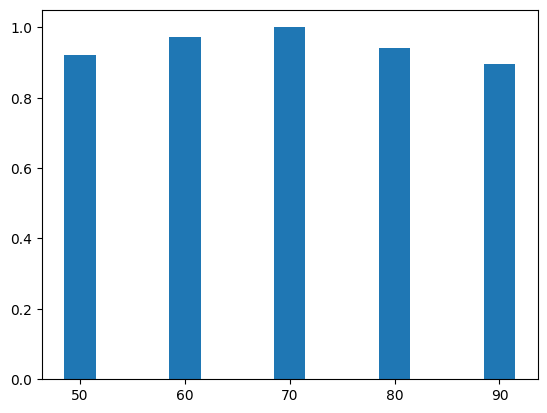

In [273]:
plt.bar(recall_beg.keys(), recall_beg.values(), 0.3)

<BarContainer object of 5 artists>

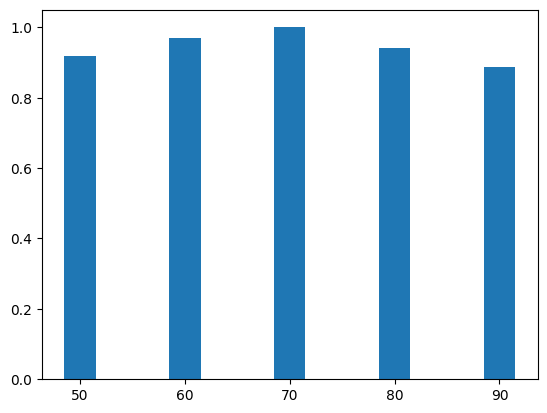

In [274]:
plt.bar(f1_beg.keys(), f1_beg.values(), 0.3)

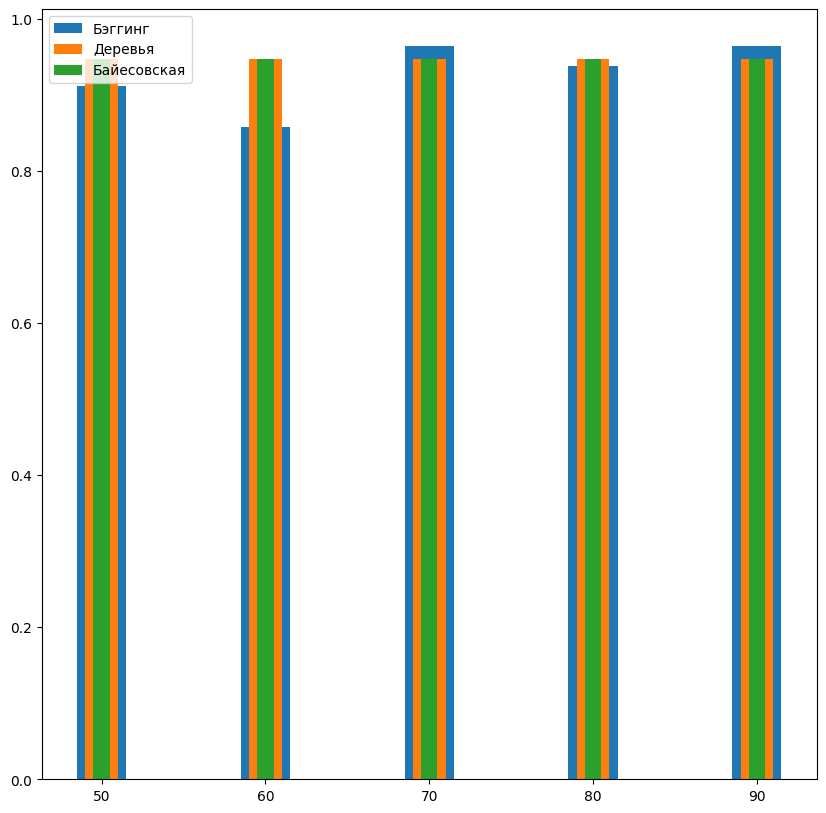

In [293]:
key = "75:25"
val_b = [accuracy_b[key] for _ in accuracy_beg.keys()]
val_t = [accuracy_t[key] for _ in accuracy_beg.keys()]

plt.figure(figsize=(10,10))
plt.bar(accuracy_beg.keys(), accuracy_beg.values(), 0.3, label = 'Бэггинг')
plt.bar(accuracy_beg.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(accuracy_beg.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()

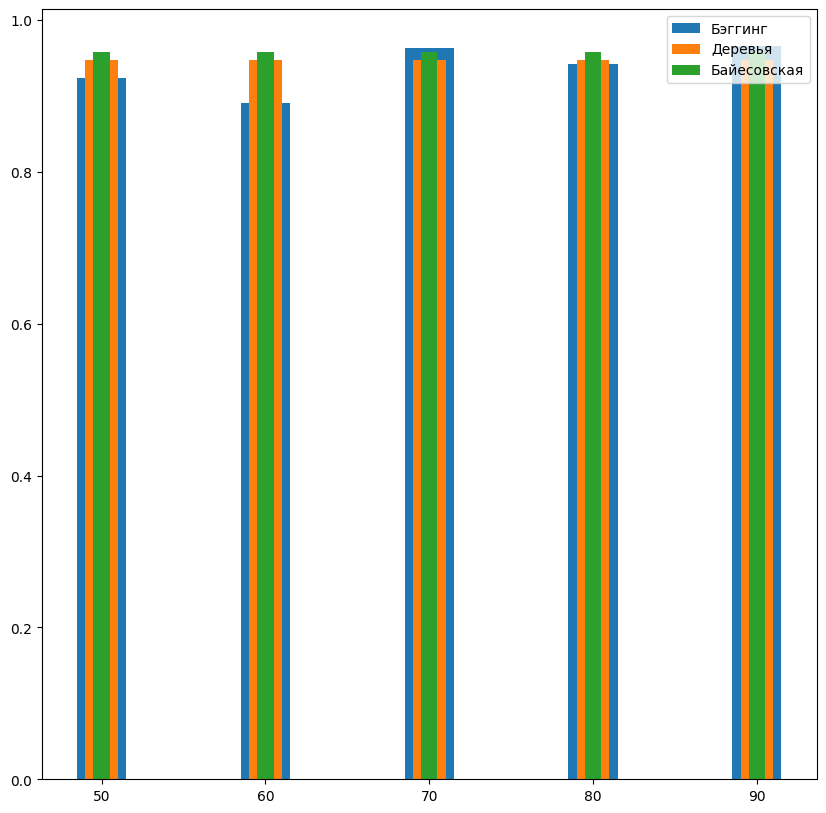

In [294]:
key = "75:25"
val_b = [precision_b[key] for _ in precision_beg.keys()]
val_t = [precision_t[key] for _ in precision_beg.keys()]

plt.figure(figsize=(10,10))
plt.bar(precision_beg.keys(), precision_beg.values(), 0.3, label = 'Бэггинг')
plt.bar(precision_beg.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(precision_beg.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()

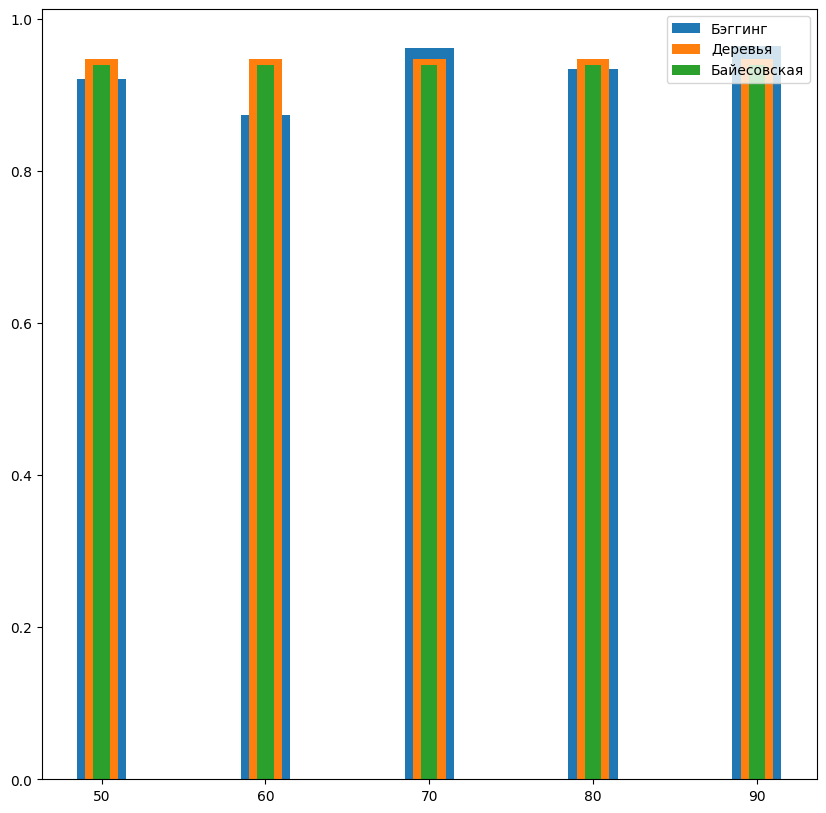

In [295]:
key = "75:25"
val_b = [recall_b[key] for _ in recall_beg.keys()]
val_t = [recall_t[key] for _ in recall_beg.keys()]

plt.figure(figsize=(10,10))
plt.bar(recall_beg.keys(), recall_beg.values(), 0.3, label = 'Бэггинг')
plt.bar(recall_beg.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(recall_beg.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()

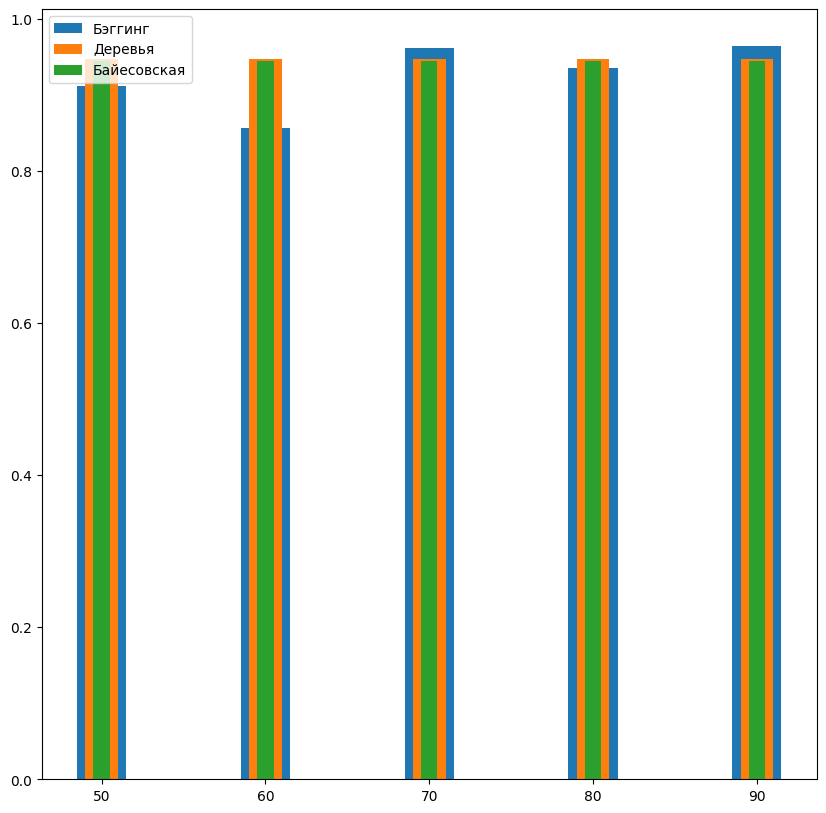

In [296]:
key = "75:25"
val_b = [f1_b[key] for _ in f1_beg.keys()]
val_t = [f1_t[key] for _ in f1_beg.keys()]

plt.figure(figsize=(10,10))
plt.bar(f1_beg.keys(), f1_beg.values(), 0.3, label = 'Бэггинг')
plt.bar(f1_beg.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(f1_beg.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()

## Случайный лес

In [297]:
from sklearn import ensemble
rclf = ensemble.RandomForestClassifier()
accuracy_r = dict()
precision_r = dict()
recall_r = dict()
f1_r = dict()
for n_estimators in np.arange(50, 100, 10):
  rclf = ensemble.RandomForestClassifier(n_estimators = n_estimators)
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.75)
  rclf = rclf.fit(X_train, y_train)
  key = "{start:.0f}".format(start = n_estimators)
  accuracy_r[key] = accuracy_score(y_val, rclf.predict(X_val))
  precision_r[key] = precision_score(y_val, rclf.predict(X_val), average='macro')
  recall_r[key] = recall_score(y_val, rclf.predict(X_val), average='macro')
  f1_r[key] = f1_score(y_val, rclf.predict(X_val), average='macro')

<BarContainer object of 5 artists>

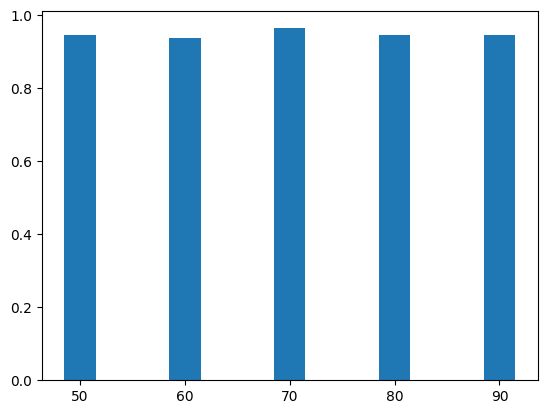

In [298]:
plt.bar(accuracy_r.keys(), accuracy_r.values(), 0.3)

<BarContainer object of 5 artists>

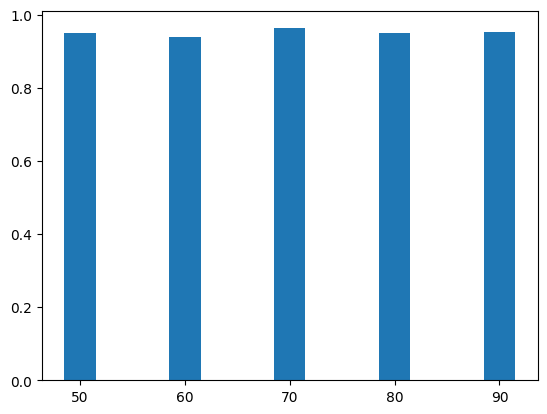

In [299]:
plt.bar(precision_r.keys(), precision_r.values(), 0.3)

<BarContainer object of 5 artists>

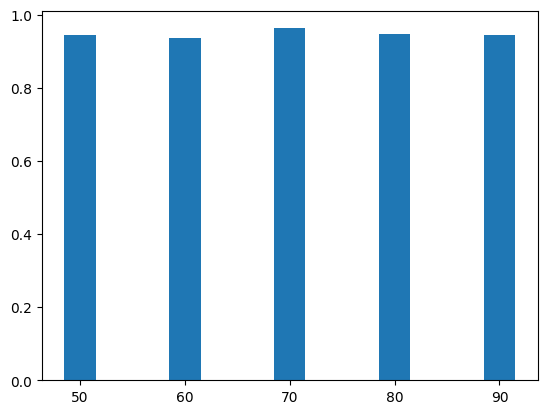

In [300]:
plt.bar(recall_r.keys(), recall_r.values(), 0.3)

<BarContainer object of 5 artists>

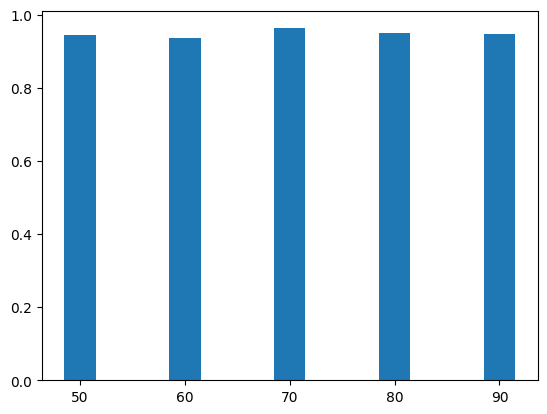

In [301]:
plt.bar(f1_r.keys(), f1_r.values(), 0.3)

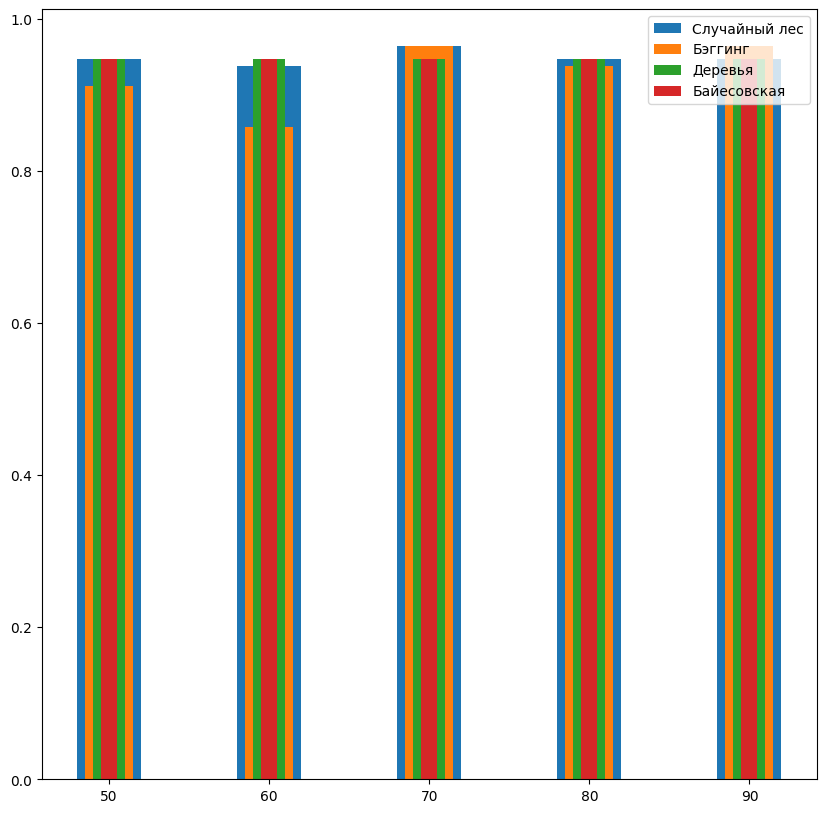

In [303]:
key = "75:25"
val_b = [accuracy_b[key] for _ in accuracy_r.keys()]
val_t = [accuracy_t[key] for _ in accuracy_r.keys()]
val_beg = [accuracy_beg[i] for i in accuracy_r.keys()]

plt.figure(figsize=(10,10))
plt.bar(accuracy_r.keys(), accuracy_r.values(), 0.4, label = 'Случайный лес')
plt.bar(accuracy_r.keys(), val_beg, 0.3, label = 'Бэггинг')
plt.bar(accuracy_r.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(accuracy_r.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()

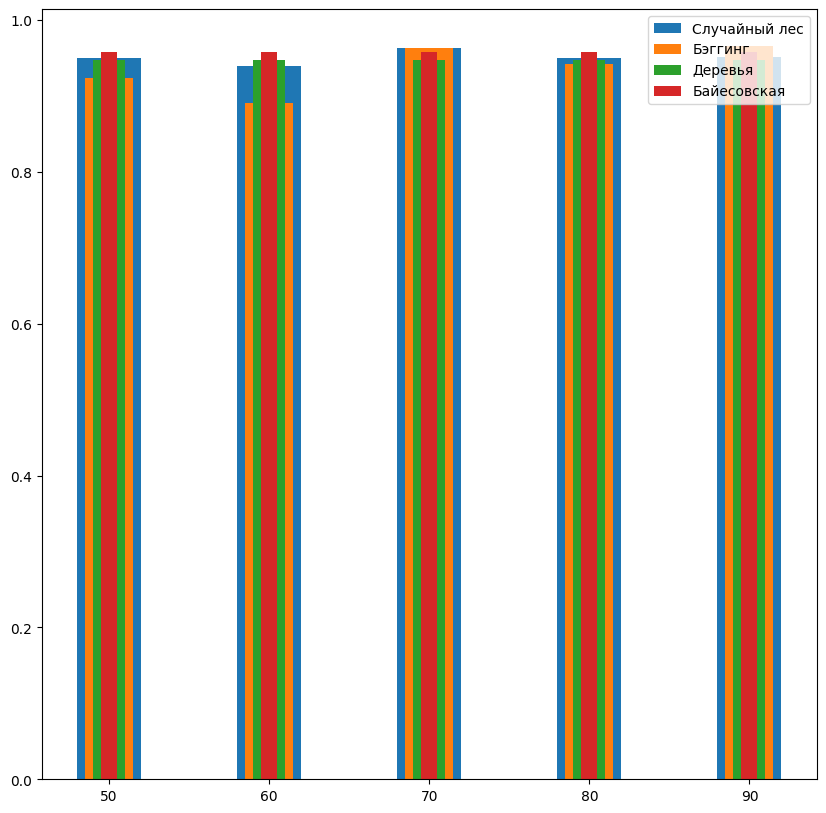

In [304]:
key = "75:25"
val_b = [precision_b[key] for _ in precision_r.keys()]
val_t = [precision_t[key] for _ in precision_r.keys()]
val_beg = [precision_beg[i] for i in precision_r.keys()]

plt.figure(figsize=(10,10))
plt.bar(precision_r.keys(), precision_r.values(), 0.4, label = 'Случайный лес')
plt.bar(precision_r.keys(), val_beg, 0.3, label = 'Бэггинг')
plt.bar(precision_r.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(precision_r.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()

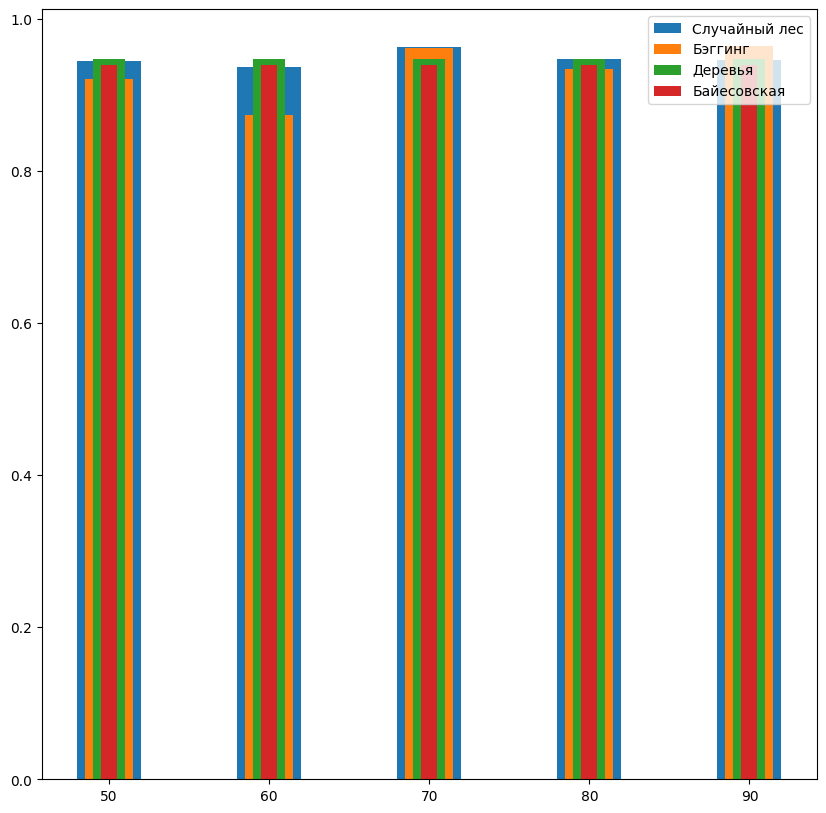

In [305]:
key = "75:25"
val_b = [recall_b[key] for _ in recall_r.keys()]
val_t = [recall_t[key] for _ in recall_r.keys()]
val_beg = [recall_beg[i] for i in recall_r.keys()]

plt.figure(figsize=(10,10))
plt.bar(recall_r.keys(), recall_r.values(), 0.4, label = 'Случайный лес')
plt.bar(recall_r.keys(), val_beg, 0.3, label = 'Бэггинг')
plt.bar(recall_r.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(recall_r.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()

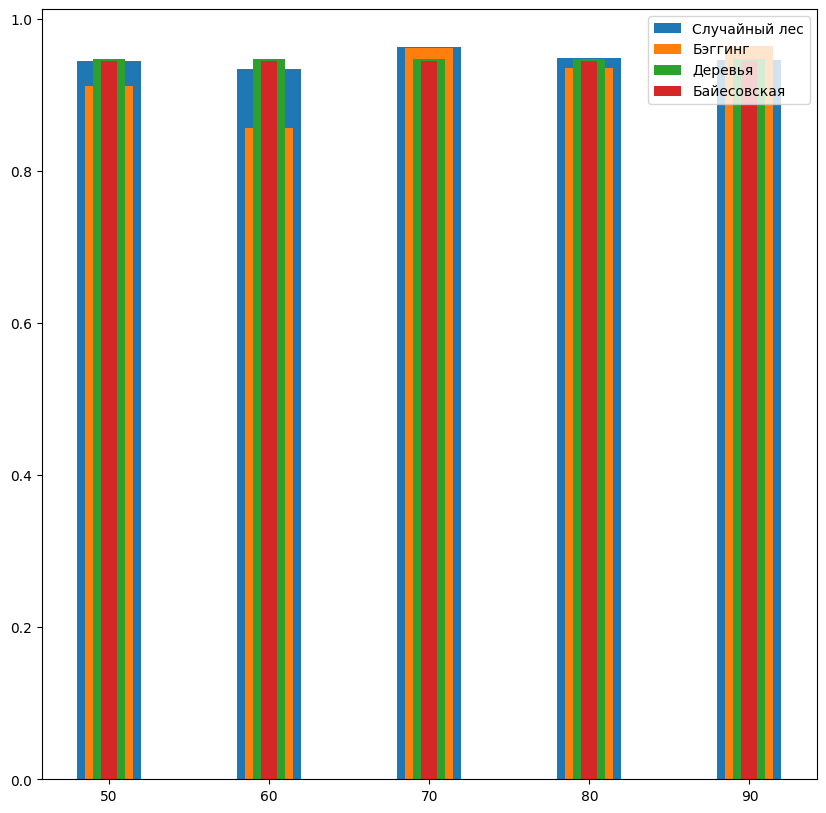

In [306]:
key = "75:25"
val_b = [f1_b[key] for _ in f1_r.keys()]
val_t = [f1_t[key] for _ in f1_r.keys()]
val_beg = [f1_beg[i] for i in f1_r.keys()]

plt.figure(figsize=(10,10))
plt.bar(f1_r.keys(), f1_r.values(), 0.4, label = 'Случайный лес')
plt.bar(f1_r.keys(), val_beg, 0.3, label = 'Бэггинг')
plt.bar(f1_r.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(f1_r.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()

## Бустинг

In [307]:
from sklearn import ensemble
accuracy_bu = dict()
precision_bu = dict()
recall_bu = dict()
f1_bu = dict()
for n_estimators in range(50, 100, 10):
  bclf = ensemble.GradientBoostingClassifier(n_estimators = n_estimators)
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75)
  bclf = bclf.fit(X_train, y_train)
  key = "{start:.0f}".format(start = n_estimators)
  accuracy_bu[key] = accuracy_score(y_val, bclf.predict(X_val))
  precision_bu[key] = precision_score(y_val, bclf.predict(X_val), average='macro')
  recall_bu[key] = recall_score(y_val, bclf.predict(X_val), average='macro')
  f1_bu[key] = f1_score(y_val, bclf.predict(X_val), average='macro')

<BarContainer object of 5 artists>

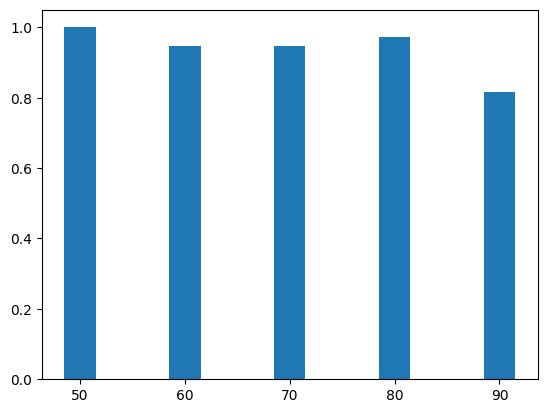

In [308]:
plt.bar(accuracy_bu.keys(), accuracy_bu.values(), 0.3)

<BarContainer object of 5 artists>

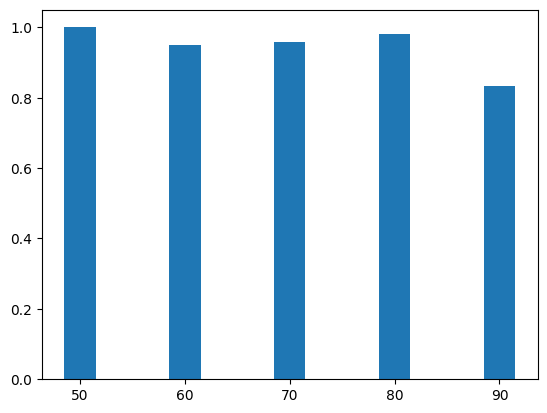

In [309]:
plt.bar(precision_bu.keys(), precision_bu.values(), 0.3)

<BarContainer object of 5 artists>

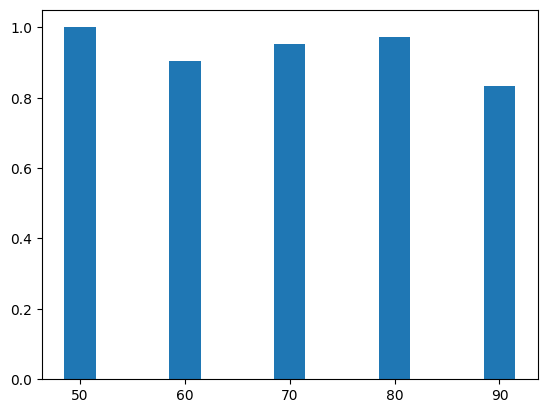

In [310]:
plt.bar(recall_bu.keys(), recall_bu.values(), 0.3)

<BarContainer object of 5 artists>

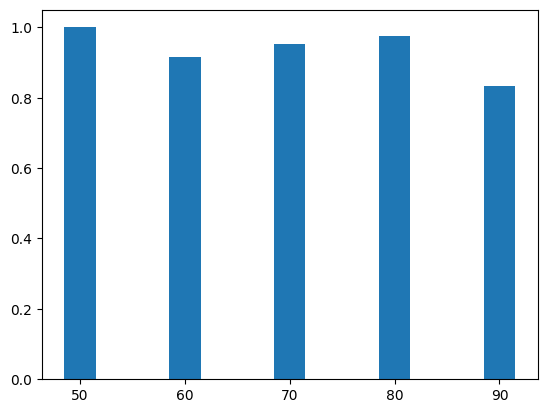

In [311]:
plt.bar(f1_bu.keys(), f1_bu.values(), 0.3)

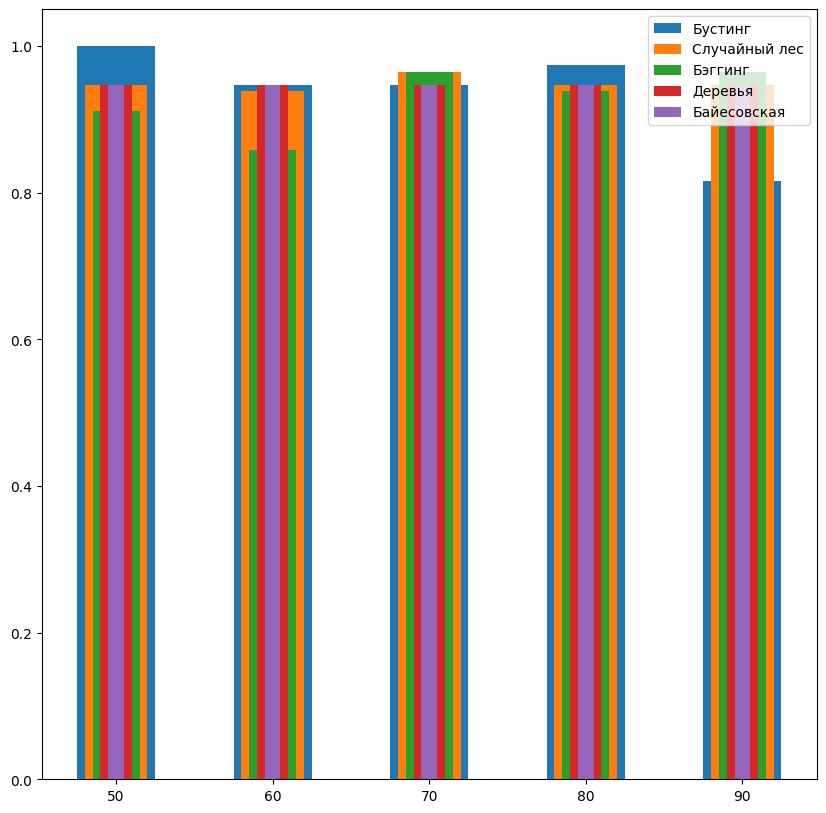

In [313]:
key = "75:25"
val_b = [accuracy_b[key] for _ in accuracy_bu.keys()]
val_t = [accuracy_t[key] for _ in accuracy_bu.keys()]
val_beg = [accuracy_beg[i] for i in accuracy_bu.keys()]
val_r = [accuracy_r[i] for i in accuracy_bu.keys()]

plt.figure(figsize=(10,10))
plt.bar(accuracy_bu.keys(), accuracy_bu.values(), 0.5, label = 'Бустинг')
plt.bar(accuracy_bu.keys(), val_r, 0.4, label = 'Случайный лес')
plt.bar(accuracy_bu.keys(), val_beg, 0.3, label = 'Бэггинг')
plt.bar(accuracy_bu.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(accuracy_bu.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()

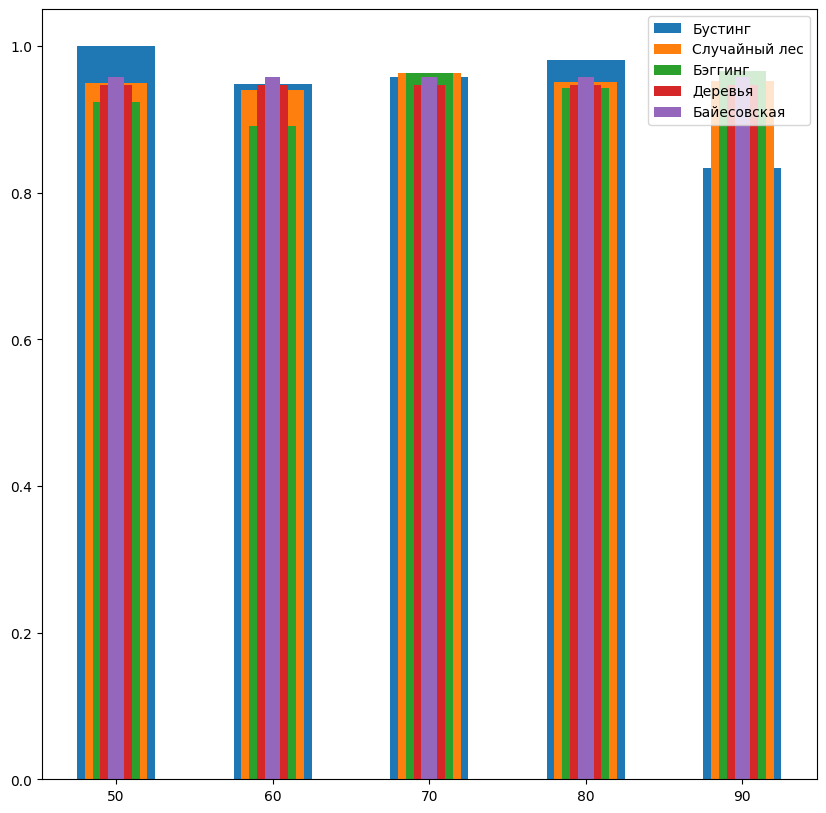

In [314]:
key = "75:25"
val_b = [precision_b[key] for _ in precision_bu.keys()]
val_t = [precision_t[key] for _ in precision_bu.keys()]
val_beg = [precision_beg[i] for i in precision_bu.keys()]
val_r = [precision_r[i] for i in precision_bu.keys()]

plt.figure(figsize=(10,10))
plt.bar(precision_bu.keys(), precision_bu.values(), 0.5, label = 'Бустинг')
plt.bar(precision_bu.keys(), val_r, 0.4, label = 'Случайный лес')
plt.bar(precision_bu.keys(), val_beg, 0.3, label = 'Бэггинг')
plt.bar(precision_bu.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(precision_bu.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()

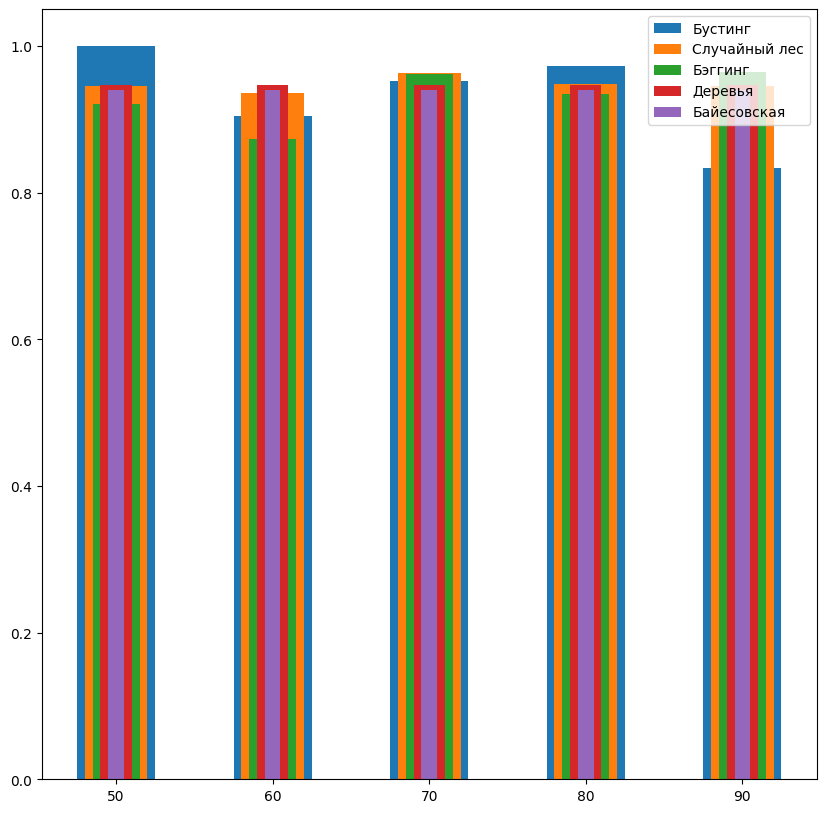

In [315]:
key = "75:25"
val_b = [recall_b[key] for _ in recall_bu.keys()]
val_t = [recall_t[key] for _ in recall_bu.keys()]
val_beg = [recall_beg[i] for i in recall_bu.keys()]
val_r = [recall_r[i] for i in recall_bu.keys()]

plt.figure(figsize=(10,10))
plt.bar(recall_bu.keys(), recall_bu.values(), 0.5, label = 'Бустинг')
plt.bar(recall_bu.keys(), val_r, 0.4, label = 'Случайный лес')
plt.bar(recall_bu.keys(), val_beg, 0.3, label = 'Бэггинг')
plt.bar(recall_bu.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(recall_bu.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()

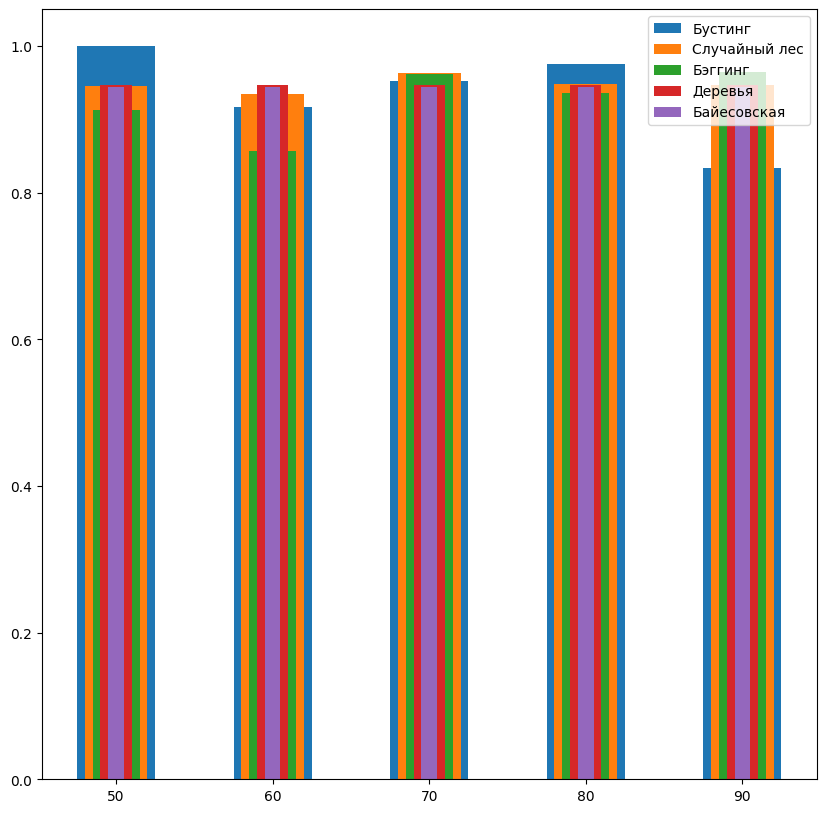

In [316]:
key = "75:25"
val_b = [f1_b[key] for _ in f1_bu.keys()]
val_t = [f1_t[key] for _ in f1_bu.keys()]
val_beg = [f1_beg[i] for i in f1_bu.keys()]
val_r = [f1_r[i] for i in f1_bu.keys()]

plt.figure(figsize=(10,10))
plt.bar(f1_bu.keys(), f1_bu.values(), 0.5, label = 'Бустинг')
plt.bar(f1_bu.keys(), val_r, 0.4, label = 'Случайный лес')
plt.bar(f1_bu.keys(), val_beg, 0.3, label = 'Бэггинг')
plt.bar(f1_bu.keys(), val_t, 0.2, label = 'Деревья')
plt.bar(f1_bu.keys(), val_b, 0.1, label = 'Байесовская')
plt.legend()